# Set up

In [2]:
# Install packages

!pip install umap-learn mpld3 adjustText afinn vaderSentiment datetime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 88 kB 4.8 MB/s 
     |████████████████████████████████| 201 kB 68.0 MB/s 
     |████████████████████████████████| 52 kB 1.3 MB/s 
     |████████████████████████████████| 125 kB 63.0 MB/s 
     |████████████████████████████████| 52 kB 1.1 MB/s 
     |████████████████████████████████| 1.1 MB 47.8 MB/s 
     |████████████████████████████████| 254 kB 55.2 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82829 sha256=92db660c06da6878f3e7136a40a89688ec6c11470e5e8fed8845ff34a5e48cf8
  Stored in directory: /root/.cache/pip/wheels/b3/52/a5/1fd9e3e76a7ab34f134c07469cd6f16e27ef3a37aeff1fe821
  Created wheel for pynndescent: filename=pynndescent-0.5.8-py3-none-any.whl size=55513 sha256=ae06e3e86ede97e4205d8b6e112dd3624bc9582e6361d52289a17ae16ef8ade5
  Stored in directory: /root/.cache/pip/wheels/19/bc/eb/974072a56a7082a302f8

In [3]:
# Load dependencies

import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import numpy as np
from sklearn.decomposition import NMF
import umap.umap_ as umap
from sklearn.cluster import DBSCAN
from scipy.spatial import ConvexHull
import mpld3
from adjustText import adjust_text
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import HoverTool, ColumnDataSource, CategoricalColorMapper
from bokeh.palettes import Spectral10
from bokeh.models import Label, LabelSet
import nltk
from nltk import word_tokenize          
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
stopwords = stopwords.words('english')
from afinn import Afinn
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from datetime import datetime
import plotly.express as px

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [4]:
# Mount drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Data acquisition and preparation

In [5]:
# Load datasets

df_2018 = pd.read_csv('/content/drive/MyDrive/text-as-data/assignment-3/news_2018.csv')

df_2022 = pd.read_csv('/content/drive/MyDrive/text-as-data/assignment-3/news_2022.csv')

In [8]:
df_2018.head()

,stories_id,publish_date,title,url,language,ap_syndicated,themes,media_id,media_name,media_url,year
0,1009123114,2018-10-01 14:31:06,Orange County football rushing leaders after W...,https://www.ocregister.com/2018/10/01/orange-c...,NaN,False,NaN,659381,Coast Magazine,http://www.coastmagazine.com/,2018
1,1007852321,2018-10-01 00:11:02,Former Ivory Coast leader Gbagbo begins freedo...,https://www.france24.com/en/20181001-former-iv...,en,False,NaN,40606,france24-en,http://www.france24.com/en/,2018
2,1010268876,2018-10-03 00:00:00,Bolsonaro obtém ligeira vantagem nas sondagens,http://jornaldeangola.sapo.ao/mundo/bolsonaro_...,pt,False,NaN,659603,El Hispano - United States - Missouri,http://www.elhispanostl.com/,2018
3,1007891510,2018-10-01 02:55:00,Why Brazil's business elites are warming to a ...,https://article.wn.com/view/2018/10/01/Why_Bra...,en,False,NaN,95973,WorldNews.com,http://wn.com/#spider,2018
4,1010700420,2018-10-03 11:11:56,Umstrittener Kandidat Bolsonaro: Brasiliens Fr...,http://www.spiegel.de/politik/ausland/jair-bol...,de,False,NaN,300537,International - SPIEGEL ONLINE,http://www.spiegel.de/international/,2018


In [9]:
df_2022.head()

,stories_id,publish_date,title,url,language,ap_syndicated,themes,media_id,media_name,media_url,year
0,2435905250,2022-10-01 00:28:25,"Bolsonaro or Lula? As Brazil prepares to vote,...",https://kesq.com/news/2022/09/30/bolsonaro-or-...,en,False,NaN,30826,kesq.com,http://www.kesq.com#spider,2022
1,2435910618,2022-10-01 00:28:25,"Bolsonaro or Lula? As Brazil prepares to vote,...",https://www.cnn.com/2022/10/01/americas/brazil...,en,False,NaN,20088,CNN U.S. Edition,http://us.cnn.com,2022
2,2435906754,2022-10-01 00:28:25,"Bolsonaro or Lula? As Brazil prepares to vote,...",https://ktvz.com/news/2022/09/30/bolsonaro-or-...,en,False,NaN,133933,ktvz.com,http://ktvz.com/,2022
3,2435911579,2022-10-01 00:30:26,Así fueron los 8 años de Gobierno de Lula da S...,https://krdo.com/telemundo/noticias/cnn-spanis...,es,False,NaN,66979,krdo.com,http://www.krdo.com/#spider,2022
4,2435909809,2022-10-01 00:28:25,"Bolsonaro or Lula? As Brazil prepares to vote,...",https://www.cnn.com/2022/10/01/americas/brazil...,en,False,NaN,300133,"Alltop, all the top stories",http://www.alltop.com/,2022


In [6]:
# Join data sets and transform date 

df_2018['year'] = '2018'

df_2022['year'] = '2022'

df = pd.concat([df_2018, df_2022])

df = df.drop_duplicates(subset=["title"], keep=False)

df = df[df["language"] == 'en'].reset_index(drop=True)

df['publish_date'] = pd.to_datetime(df.publish_date, infer_datetime_format=True)

df.head()

#df['publish_date'].dt.month)

,stories_id,publish_date,title,url,language,ap_syndicated,themes,media_id,media_name,media_url,year
0,1007852321,2018-10-01 00:11:02,Former Ivory Coast leader Gbagbo begins freedo...,https://www.france24.com/en/20181001-former-iv...,en,False,NaN,40606,france24-en,http://www.france24.com/en/,2018
1,1007891510,2018-10-01 02:55:00,Why Brazil's business elites are warming to a ...,https://article.wn.com/view/2018/10/01/Why_Bra...,en,False,NaN,95973,WorldNews.com,http://wn.com/#spider,2018
2,1008053027,2018-10-01 06:40:50,Monday US briefing: Kavanaugh investigation go...,https://www.theguardian.com/us-news/2018/oct/0...,en,False,NaN,623382,Guardian,http://www.theguardian.com/us,2018
3,1008079371,2018-10-01 07:13:00,How to Tackle Malnutrition In Africa By Encour...,https://www.forbes.com/sites/mfonobongnsehe/20...,en,False,NaN,1104,Forbes,http://www.forbes.com/,2018
4,1008153230,2018-10-01 00:00:00,The Decline and Fall of Brazil’s Political Est...,https://www.foreignaffairs.com/articles/brazil...,en,False,NaN,46603,Foreign Affairs,http://m.foreignaffairs.com/#spider,2018


In [7]:
# Prepare your data for topic modelling by creating a document feature matrix

def lemma_tokenizer(str_input):
    default_tokenizer = CountVectorizer().build_tokenizer()
    tokens = default_tokenizer(str_input)
    stopwords.extend(['luiz','inácio','da','silva','lula','new','news','say','jair','bolsonaro','president','brazil','election','brazilian','presidency','presidential','ap','edt','est','oct','ibd','u'])
    tokens = [WordNetLemmatizer().lemmatize(token) for token in tokens if token not in stopwords]
    return tokens

import re
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'\d+', '', text)
    return text

vec = CountVectorizer(tokenizer=lemma_tokenizer,preprocessor=preprocess_text)

X = vec.fit_transform(df.title)

dfm = pd.DataFrame(X.toarray(), columns=vec.get_feature_names_out(), index=df.index)

dfm

,able,abortion,abound,abroad,absence,absent,absentee,absolutely,abstainer,absurd,...,zitouna,ziv,zloty,zoe,zone,ádaalnéhígíí,át,ávila,étienne,ílįįgo
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3568,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3569,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3570,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3571,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Topic modelling



In [10]:
# Create a topic model using data

nmf = NMF(5,random_state=42)
W = nmf.fit_transform(dfm)

/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:294: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  FutureWarning,


In [11]:
# Get words and corresponding weights resulting from the topic model in a table

def display_topics(model, feature_names, no_top_words):
    topic_dict = {}
    for topic_idx, topic in enumerate(model.components_):
        topic_dict["Topic %d words" % (topic_idx)]= ['{}'.format(feature_names[i])
                        for i in topic.argsort()[:-no_top_words - 1:-1]]
        topic_dict["Topic %d weights" % (topic_idx)]= ['{:.1f}'.format(topic[i])
                        for i in topic.argsort()[:-no_top_words - 1:-1]]
    
    return pd.DataFrame(topic_dict)

In [12]:
# Get name of each title: augment the number of words per topic and base it on the results 

no_top_words = 15

display_topics(nmf, vec.get_feature_names_out(), no_top_words)

,Topic 0 words,Topic 0 weights,Topic 1 words,Topic 1 weights,Topic 2 words,Topic 2 weights,Topic 3 words,Topic 3 weights,Topic 4 words,Topic 4 weights
0,right,3.7,trump,4.0,market,2.3,win,3.0,climate,2.4
1,far,2.8,donald,0.4,stock,1.8,runoff,1.3,world,1.1
2,candidate,1.6,say,0.3,emerging,1.3,vote,0.9,amazon,1.0
3,lead,0.6,tropic,0.3,latam,0.8,round,0.5,cop,0.9
4,poll,0.6,foreign,0.2,gain,0.5,first,0.5,change,0.7
5,wing,0.3,live,0.2,fx,0.5,head,0.2,leader,0.5
6,elect,0.3,elect,0.2,real,0.5,leftist,0.2,summit,0.4
7,vote,0.2,venezuela,0.2,fed,0.4,election,0.2,say,0.4
8,update,0.2,tropical,0.2,dollar,0.4,defeat,0.2,victory,0.4
9,round,0.2,war,0.2,currency,0.3,face,0.2,talk,0.4


In [13]:
# Title dictionary

topics={0:"Far right", 1: "Donald Trump", 2: "Emerging stock markets", 3: "Election results", 4:"World climate"}

In [14]:
# Create df with topics

df_w = pd.DataFrame(W)

df_w.head()

,0,1,2,3,4
0,0.003759,0.008884,0.000467,0.003633,0.053187
1,0.258576,0.000000,0.000000,0.000000,0.000000
2,0.001945,0.012151,0.014014,0.006794,0.028077
3,0.000006,0.001104,0.000276,0.000000,0.005115
4,0.000000,0.005688,0.023278,0.008111,0.004857


In [15]:
# Merge df with topics df

topics_df = pd.concat([df,df_w], axis=1)

topics_df.head()

,stories_id,publish_date,title,url,language,ap_syndicated,themes,media_id,media_name,media_url,year,0,1,2,3,4
0,1007852321,2018-10-01 00:11:02,Former Ivory Coast leader Gbagbo begins freedo...,https://www.france24.com/en/20181001-former-iv...,en,False,NaN,40606,france24-en,http://www.france24.com/en/,2018,0.003759,0.008884,0.000467,0.003633,0.053187
1,1007891510,2018-10-01 02:55:00,Why Brazil's business elites are warming to a ...,https://article.wn.com/view/2018/10/01/Why_Bra...,en,False,NaN,95973,WorldNews.com,http://wn.com/#spider,2018,0.258576,0.000000,0.000000,0.000000,0.000000
2,1008053027,2018-10-01 06:40:50,Monday US briefing: Kavanaugh investigation go...,https://www.theguardian.com/us-news/2018/oct/0...,en,False,NaN,623382,Guardian,http://www.theguardian.com/us,2018,0.001945,0.012151,0.014014,0.006794,0.028077
3,1008079371,2018-10-01 07:13:00,How to Tackle Malnutrition In Africa By Encour...,https://www.forbes.com/sites/mfonobongnsehe/20...,en,False,NaN,1104,Forbes,http://www.forbes.com/,2018,0.000006,0.001104,0.000276,0.000000,0.005115
4,1008153230,2018-10-01 00:00:00,The Decline and Fall of Brazil’s Political Est...,https://www.foreignaffairs.com/articles/brazil...,en,False,NaN,46603,Foreign Affairs,http://m.foreignaffairs.com/#spider,2018,0.000000,0.005688,0.023278,0.008111,0.004857


# Sentiment analysis

In [16]:
# Create df with sentiments

analyzer = SentimentIntensityAnalyzer()

results = [analyzer.polarity_scores(x) for x in df["title"]]
sentiment = pd.DataFrame.from_dict(results)

sentiment.head()

,neg,neu,pos,compound
0,0.0,0.682,0.318,0.6369
1,0.0,0.873,0.127,0.1531
2,0.0,1.000,0.000,0.0000
3,0.0,0.746,0.254,0.5267
4,0.0,1.000,0.000,0.0000


In [29]:
# Merge topic df with sentiments df

sentiment_df = pd.concat([topics_df,sentiment], axis=1)

sentiment_df.head()

,stories_id,publish_date,title,url,language,ap_syndicated,themes,media_id,media_name,media_url,year,0,1,2,3,4,neg,neu,pos,compound
0,1007852321,2018-10-01 00:11:02,Former Ivory Coast leader Gbagbo begins freedo...,https://www.france24.com/en/20181001-former-iv...,en,False,NaN,40606,france24-en,http://www.france24.com/en/,2018,0.003759,0.008884,0.000467,0.003633,0.053187,0.0,0.682,0.318,0.6369
1,1007891510,2018-10-01 02:55:00,Why Brazil's business elites are warming to a ...,https://article.wn.com/view/2018/10/01/Why_Bra...,en,False,NaN,95973,WorldNews.com,http://wn.com/#spider,2018,0.258576,0.000000,0.000000,0.000000,0.000000,0.0,0.873,0.127,0.1531
2,1008053027,2018-10-01 06:40:50,Monday US briefing: Kavanaugh investigation go...,https://www.theguardian.com/us-news/2018/oct/0...,en,False,NaN,623382,Guardian,http://www.theguardian.com/us,2018,0.001945,0.012151,0.014014,0.006794,0.028077,0.0,1.000,0.000,0.0000
3,1008079371,2018-10-01 07:13:00,How to Tackle Malnutrition In Africa By Encour...,https://www.forbes.com/sites/mfonobongnsehe/20...,en,False,NaN,1104,Forbes,http://www.forbes.com/,2018,0.000006,0.001104,0.000276,0.000000,0.005115,0.0,0.746,0.254,0.5267
4,1008153230,2018-10-01 00:00:00,The Decline and Fall of Brazil’s Political Est...,https://www.foreignaffairs.com/articles/brazil...,en,False,NaN,46603,Foreign Affairs,http://m.foreignaffairs.com/#spider,2018,0.000000,0.005688,0.023278,0.008111,0.004857,0.0,1.000,0.000,0.0000


In [18]:
# Headlines with lowest sentiment

sentiment_df.sort_values("compound").head()[["title","compound"]].values

array([["STOP The WARS! Paris Protests Trump & Macron's War Crimes On Armistice Day 2018",
        -0.924],
       ["The 'Brazilian Donald Trump' just became president in a landslide. He got there despite saying he couldn't love a gay son and that a colleague was too 'ugly' to be raped.",
        -0.9056],
       ['CCTV shows moments before fatal bridge collapse in India, killing more than 100',
        -0.9022],
       ['LETTERS - It’s right to challenge racist lies over child sexual abuse',
        -0.8934],
       ["'Flowering of hate': bitter election brings wave of political violence to Brazil",
        -0.891]], dtype=object)

In [19]:
# Headlines with higher sentiment

sentiment_df.sort_values("compound", ascending=False).head()[["title","compound"]].values

array([['VINDICATED: Lula supporters celebrate in Autazes, Amazonas State',
        0.8788],
       ['Día de los Muertos celebrations help families honor, remember deceased loved ones',
        0.8689],
       ['Holiday Gift Guide 2022 • House Beautiful', 0.8591],
       ['Somerset ready to accept MassWorks grant to improve Route 6',
        0.8591],
       ["Brazil's Comedians See Perfect Timing 'To Make People Laugh'",
        0.8591]], dtype=object)

# Visualisations

In [122]:
# Headlines per election year

df_years = df.groupby("year")["title"].count().reset_index()

fig = px.bar(df_years, x="year", y="title", color="year", title="Headlines per election year")

fig.show()

<Figure size 432x288 with 0 Axes>

In [123]:
# Top sources of media coverage

df_media = df.groupby("media_name")["title"].count().reset_index()

df_media = df_media.sort_values("title", ascending=False).reset_index().head(10)

fig = px.bar(df_media, x="media_name", y="title", color="media_name", title="Headlines per top media")

fig.show()

<Figure size 432x288 with 0 Axes>

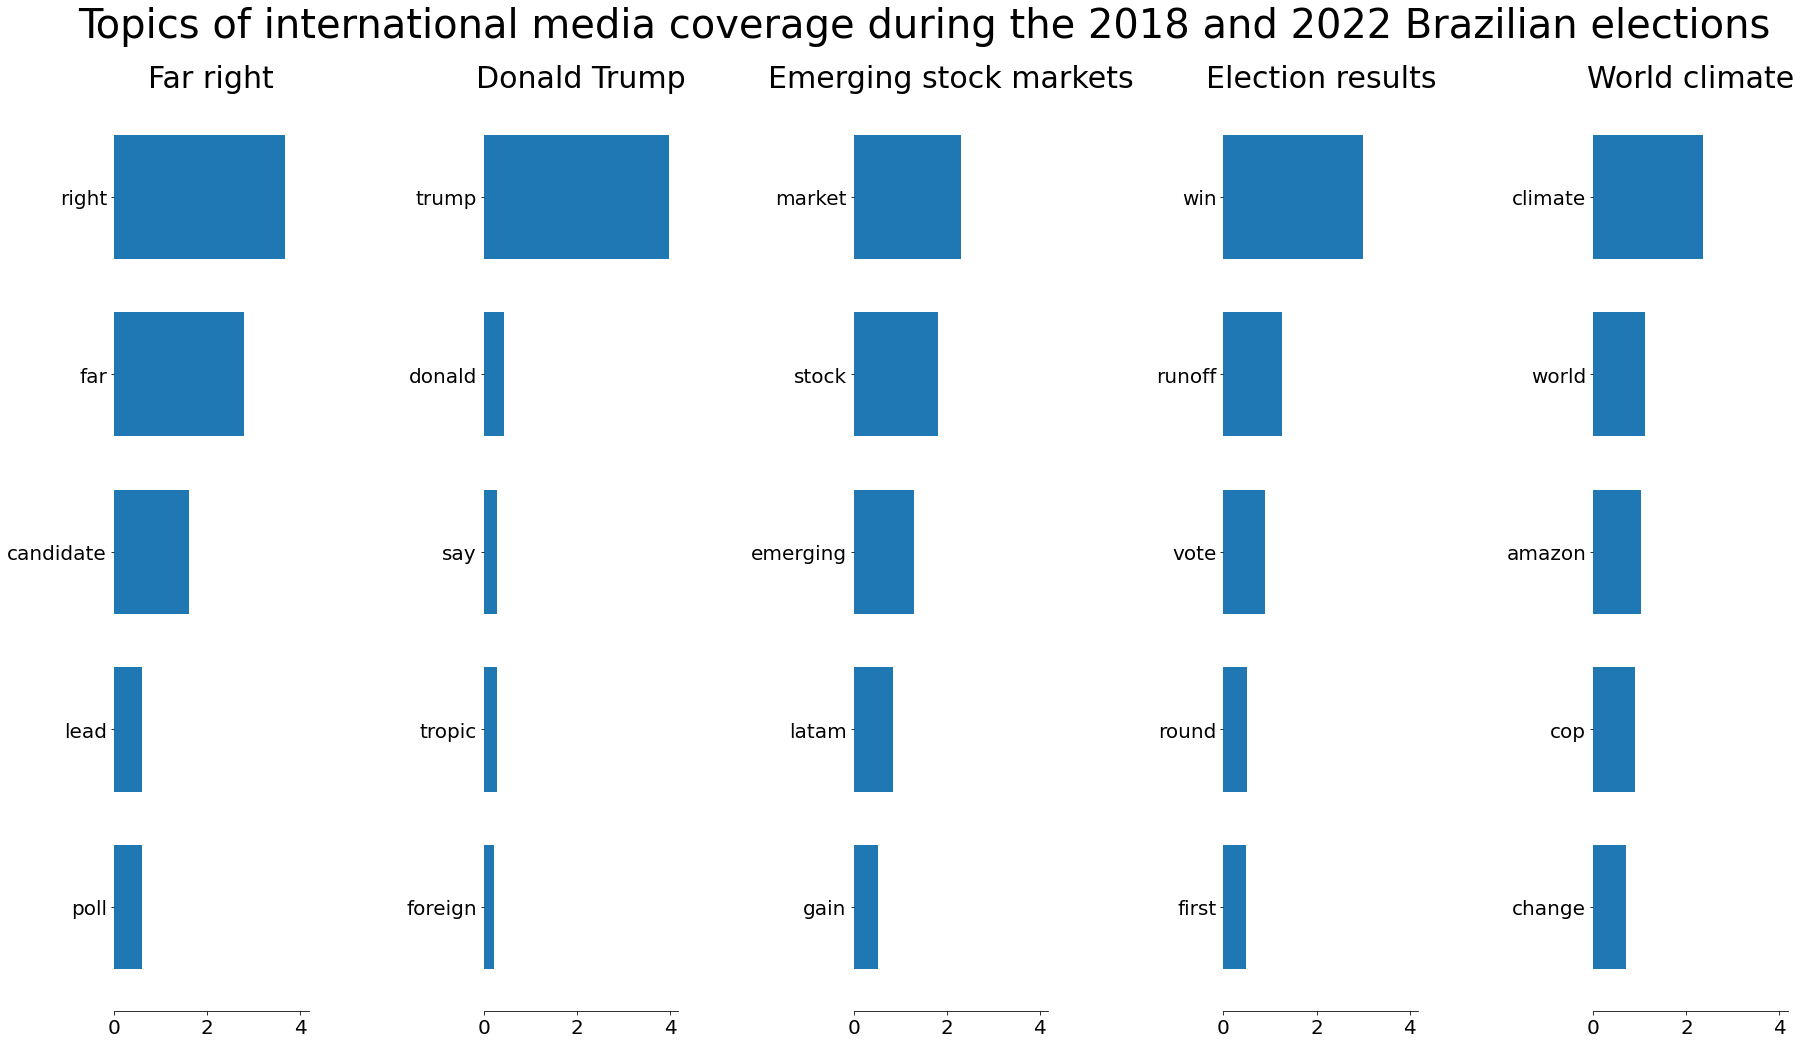

<Figure size 432x288 with 0 Axes>

In [124]:
# Describing the topic model

def plot_top_words(model, feature_names, n_top_words, title):
    n_components = model.n_components_
    fig, axes = plt.subplots(n_components//5,5, figsize=(30, 15), sharex=True)
    axes = axes.flatten()
    t_titles = []
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[: -n_top_words - 1 : -1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f"{topics[topic_idx]}", fontdict={"fontsize": 30})
        ax.invert_yaxis()
        ax.tick_params(axis="both", which="major", labelsize=20)
        for i in "top right left".split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)
        
        t_titles.append(", ".join(top_features[:3]))

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()
    
    return t_titles

t_titles = plot_top_words(nmf, vec.get_feature_names_out(), 5, "Topics of international media coverage during the 2018 and 2022 Brazilian elections")

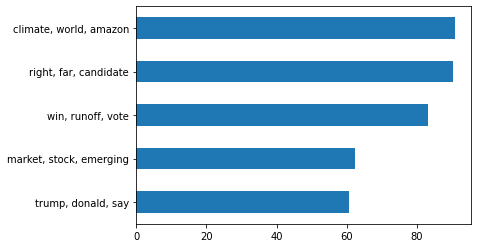

In [138]:
# Top words per topic

total_sums = W.sum(axis=0)
fig, ax = plt.subplots()

df_W = pd.DataFrame(W)
df_W.columns = t_titles
df_W.sum(axis=0).sort_values().plot.barh()

plt.savefig('/content/drive/MyDrive/text-as-data/assignment-3/topics_words.png')

(3573, 5)
(3573, 2)


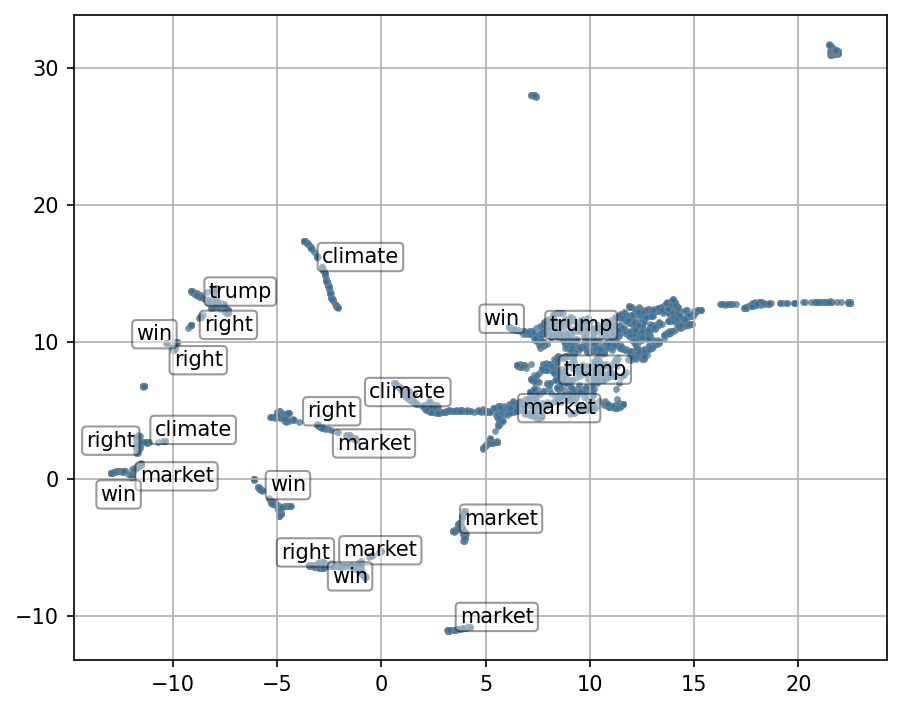

In [125]:
# Scatter plot for topics map

print(W.shape)
reducer = umap.UMAP()
embedding = reducer.fit_transform(W)
print(embedding.shape)
fig, ax = plt.subplots(figsize=(7,5.7),dpi=150)

scatter = ax.scatter(
    embedding[:,0], embedding[:,1], cmap='YlGn', 
    alpha=0.7, s=8,
    lw=0.5, ec="grey"
)

def cluster_label_points(
    title, points, ax, eps,
    min_cluster, clabel_size,
    ):

    db = DBSCAN(eps=eps,min_samples=min_cluster).fit(points)
    labels = db.labels_
    texts = []

    for l in set(labels):
        if l==-1:
            continue
        
        ind = np.argwhere(labels==l).ravel()
        lpoints = points[ind]
        if len(ind) > min_cluster:
            hull = ConvexHull(lpoints)
            cx = np.mean(hull.points[hull.vertices,0])
            cy = np.mean(hull.points[hull.vertices,1])
            c = [cx,cy]
            title = title.split(",")[0].replace("{","")
            text = ax.annotate(
                title, c, fontsize=clabel_size,
                ha="center",va="center",
                bbox={'facecolor':"white", 'alpha':0.4, 'pad':0.2, 'boxstyle': 'round'}
            )
            texts.append(text)
    return texts
            
min_cluster = 15
eps = 1
clabel_size = 10
t_thresh = 0.8
texts = []

for t_index, title in enumerate(t_titles):
    scores = W[:,t_index][W[:,t_index].nonzero()] 
    thresh = np.quantile(scores, t_thresh)
    highlight_docs = np.argwhere(W[:,t_index]>thresh).ravel()
    points = embedding[highlight_docs]
    texts += cluster_label_points(
        title,
        points,
        ax,
        eps,
        min_cluster,
        clabel_size
    )

adjust_text(texts,ax=ax, arrowprops=dict(arrowstyle="->", color='None', lw=0.5))
 
ax.grid(linestyle='-')

plt.savefig('/content/drive/MyDrive/text-as-data/assignment-3/topics_scatter_plot.png')

In [133]:
# Compare presence of topics in 2018 and 2022

import plotly

topics_df_long=pd.melt(topics_df, id_vars=['title', 'year'], value_vars=[0,1,2,3,4])

grouped_year_party=topics_df_long.groupby(['year','variable']).mean().reset_index()

grouped_year_party=grouped_year_party.reset_index().rename(columns={"variable":"topic", "value": "share"})

grouped_year_party=grouped_year_party.replace(topics)

fig = px.bar(grouped_year_party, x="topic", y="share", color="year",   facet_col="year", barmode="group",
                labels=dict(variable="Share", topics="Topics"),
                title="Share of topics per election year",
                width=1400, height=800)
fig.show()

'/content/drive/MyDrive/text-as-data/assignment-3/topics_year.html'

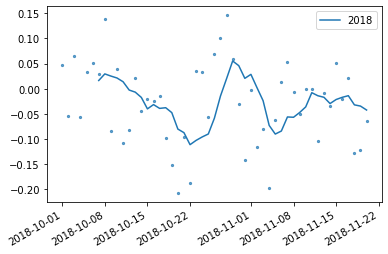

In [127]:
# Sentiment day by day in 2018

sentiment_df["date"] = pd.to_datetime(df.publish_date).dt.date
daily_sentiment = (sentiment_df
                   .groupby(["date","year"])["compound"]
                   .mean()
                   .reset_index()
                   .pivot_table(columns="year", values="compound", index="date")
                   .reset_index()
                  )

daily_sentiment["date"] = pd.to_datetime(daily_sentiment["date"])
days = pd.date_range(start="2018-10-01",end="2018-11-20")
daily_sentiment = pd.DataFrame({"date": days}).merge(daily_sentiment, how="left")

fig, ax = plt.subplots()

for year in ["2018"]:
    ax.scatter(daily_sentiment.date, daily_sentiment[year], s=5, alpha=0.7)
    x = daily_sentiment[year].rolling(7).mean()
    ax.plot(daily_sentiment.date, x, label=year)

fig.autofmt_xdate()
ax.legend()

plt.savefig('/content/drive/MyDrive/text-as-data/assignment-3/sentiment_2018.png')

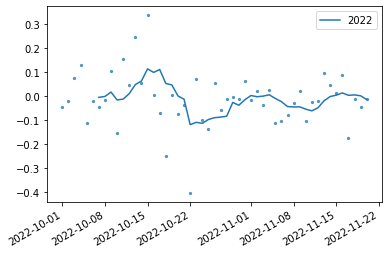

In [128]:
# Sentiment day by day in 2022

sentiment_df["date"] = pd.to_datetime(df.publish_date).dt.date
daily_sentiment = (sentiment_df
                   .groupby(["date","year"])["compound"]
                   .mean()
                   .reset_index()
                   .pivot_table(columns="year", values="compound", index="date")
                   .reset_index()
                  )

daily_sentiment["date"] = pd.to_datetime(daily_sentiment["date"])
days = pd.date_range(start="2022-10-01",end="2022-11-20")
daily_sentiment = pd.DataFrame({"date": days}).merge(daily_sentiment, how="left")

fig, ax = plt.subplots()

for year in ["2022"]:
    ax.scatter(daily_sentiment.date, daily_sentiment[year], s=5, alpha=0.7)
    x = daily_sentiment[year].rolling(7).mean()
    ax.plot(daily_sentiment.date, x, label=year)

fig.autofmt_xdate()
ax.legend()

plt.savefig('/content/drive/MyDrive/text-as-data/assignment-3/sentiment_2022.png')

In [34]:
# Topics associated with a higher sentiment in 2018 and 2022

sentiment_df_h = sentiment_df.sort_values("compound", ascending=False).reset_index()

sentiment_df_h = sentiment_df_h.head(200)

sentiment_df_long=pd.melt(sentiment_df_h, id_vars=['title', 'year'], value_vars=[0,1,2,3,4])

grouped_year_party=sentiment_df_long.groupby(['year','variable']).mean().reset_index()

grouped_year_party=grouped_year_party.reset_index().rename(columns={"variable":"topic", "value": "share"})

grouped_year_party=grouped_year_party.replace(topics)

fig = px.bar(grouped_year_party, x="topic", y="share", color="year",   facet_col="year", barmode="group",
                labels=dict(variable="Share", topics="Topics"),
                title="Share of topics with higher sentiment per election year",
                width=1400, height=800)
fig.show()

In [35]:
# Topics associated with a lower sentiment in 2018 and 2022

sentiment_df_l = sentiment_df.sort_values("compound", ascending=True).reset_index()

sentiment_df_l = sentiment_df_l.head(200)

sentiment_df_long=pd.melt(sentiment_df_l, id_vars=['title', 'year'], value_vars=[0,1,2,3,4])

grouped_year_party=sentiment_df_long.groupby(['year','variable']).mean().reset_index()

grouped_year_party=grouped_year_party.reset_index().rename(columns={"variable":"topic", "value": "share"})

grouped_year_party=grouped_year_party.replace(topics)

fig = px.bar(grouped_year_party, x="topic", y="share", color="year",   facet_col="year", barmode="group",
                labels=dict(variable="Share", topics="Topics"),
                title="Share of topics with lower sentiment per election year",
                width=1400, height=800)
fig.show()